In [1]:
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive

Mounted at /gdrive/
/gdrive


In [2]:
ls

MyDrive/  Shareddrives/


In [3]:
cd/gdrive/MyDrive/Pandas vs Racoons/

/gdrive/MyDrive/Pandas vs Racoons


In [4]:
ls

Pandas/  Racoons/


In [5]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.preprocessing.image import load_img

In [6]:
import os
import PIL
import pathlib
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import preprocessing
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.python.ops.numpy_ops import np_utils

In [7]:
BATCH_SIZE = 62
IMAGE_SIZE = 256
EPOCHS=20
CHANNELS=3

In [8]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/gdrive/MyDrive/Pandas vs Racoons",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 796 files belonging to 2 classes.


In [9]:
class_names = dataset.class_names
class_names

['Pandas', 'Racoons']

In [10]:
len(dataset)

13

In [11]:
for image_batch, label_batch in dataset.take(1):
  print(image_batch.shape)
  print(image_batch[1])
  print(label_batch.numpy())

(62, 256, 256, 3)
tf.Tensor(
[[[68.639755   44.100998   20.4944    ]
  [52.967575   32.26198    13.516144  ]
  [47.62175    30.769531   12.83876   ]
  ...
  [20.783203   23.837677    7.1484375 ]
  [36.751694   35.265106    0.9894562 ]
  [48.94336    37.08203     0.80355835]]

 [[52.678772   39.09375    15.437759  ]
  [45.021484   34.772263   14.414459  ]
  [44.528687   33.151047   14.721359  ]
  ...
  [19.866531   22.670563    4.359375  ]
  [40.006256   35.84102     0.6972656 ]
  [54.22682    38.252213    1.0949249 ]]

 [[62.110687   38.51802    18.047318  ]
  [59.332687   41.391953   21.683594  ]
  [60.54492    41.09633    25.55185   ]
  ...
  [19.9375     21.713333    4.4657288 ]
  [38.83139    37.64128     0.98698425]
  [53.207245   39.15364     0.        ]]

 ...

 [[49.827698   44.029083   24.712463  ]
  [57.294266   46.561188   36.49608   ]
  [57.589844   44.17276    34.15909   ]
  ...
  [ 8.938126    7.701248    5.6076813 ]
  [ 8.309891    9.147781    4.6341095 ]
  [ 5.8780365  

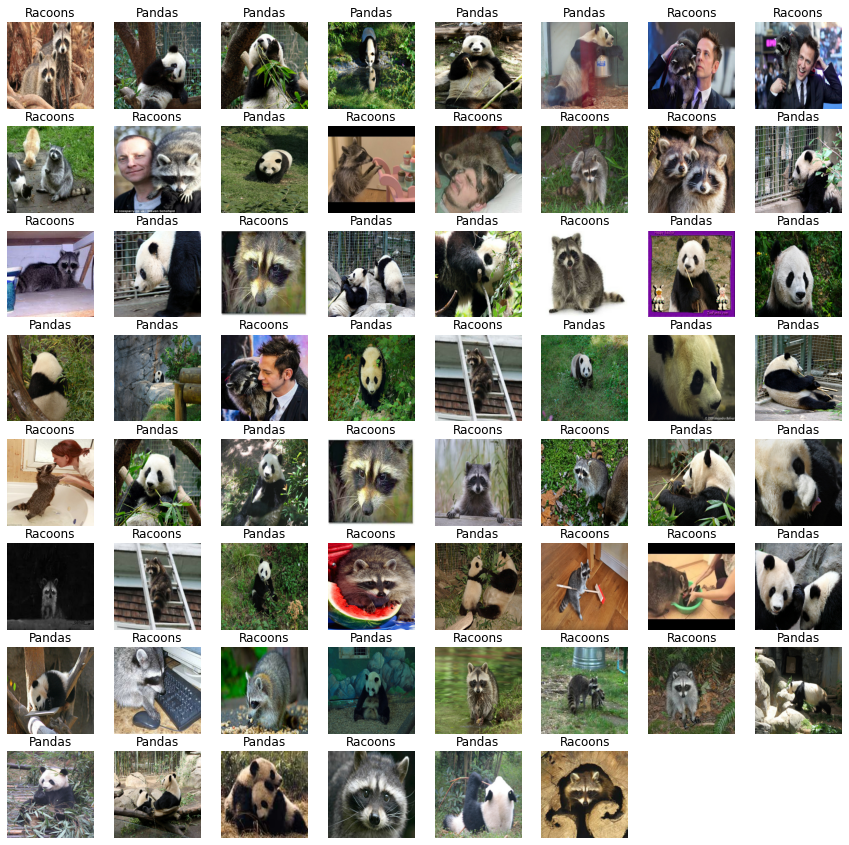

In [12]:
plt.figure(figsize=(15, 15))
for image_batch, labels_batch in dataset.take(1):
    for i in range(BATCH_SIZE):
        ax = plt.subplot(8, 8, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [13]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    # Autotune all the 3 datasets 
    train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    return train_ds, val_ds, test_ds

In [14]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [15]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [16]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [17]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 9

model = models.Sequential([
    resize_and_rescale,
    # data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape=input_shape)

In [18]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (62, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (62, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (62, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (62, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (62, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (62, 60, 60, 64)         

In [20]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS,
)

Epoch 1/20
10/10 [==============================] - 94s 7s/step - loss: 1.5788 - accuracy: 0.4197 - val_loss: 0.8870 - val_accuracy: 0.5000
Epoch 2/20
10/10 [==============================] - 66s 7s/step - loss: 0.6734 - accuracy: 0.5934 - val_loss: 0.6121 - val_accuracy: 0.6935
Epoch 3/20
10/10 [==============================] - 66s 7s/step - loss: 0.6016 - accuracy: 0.6721 - val_loss: 0.5518 - val_accuracy: 0.6935
Epoch 4/20
10/10 [==============================] - 65s 7s/step - loss: 0.5798 - accuracy: 0.6770 - val_loss: 0.5812 - val_accuracy: 0.6290
Epoch 5/20
10/10 [==============================] - 69s 7s/step - loss: 0.5505 - accuracy: 0.7164 - val_loss: 0.5786 - val_accuracy: 0.6452
Epoch 6/20
10/10 [==============================] - 69s 7s/step - loss: 0.5367 - accuracy: 0.7361 - val_loss: 0.5236 - val_accuracy: 0.7581
Epoch 7/20
10/10 [==============================] - 68s 7s/step - loss: 0.5071 - accuracy: 0.7590 - val_loss: 0.4756 - val_accuracy: 0.7742
Epoch 8/20
10/10 [==

In [21]:
model.evaluate(test_ds)

2/2 [==============================] - 7s 2s/step - loss: 0.1851 - accuracy: 0.9516


[0.18509018421173096, 0.9516128897666931]

In [22]:
acc = history.history['accuracy']
loss = history.history['loss']

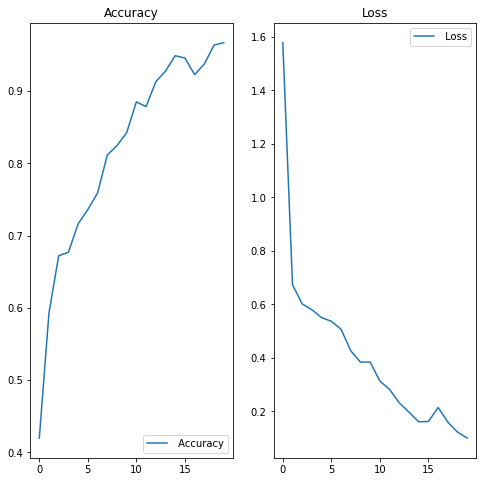

In [23]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label=' Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label=' Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

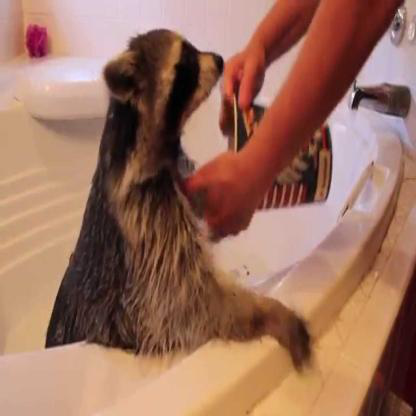

In [24]:
image_path = "/gdrive/My Drive/raccoon190.jpg"
image = preprocessing.image.load_img(image_path)
image_array = preprocessing.image.img_to_array(image)
scaled_img = np.expand_dims(image_array, axis=0)
image

In [25]:
pred = model.predict(scaled_img)

In [26]:
output = class_names[np.argmax(pred)]

In [27]:
output

'Racoons'

In [28]:
model.save("Pandas vs Racoons.h5")